In [101]:
#importing packages required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import scale
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf

In [102]:
import io
from google.colab import files
  
uploaded = files.upload()
df_diabetes = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
print(df_diabetes)

In [103]:
#shape of the dataframe
df_diabetes.shape

(768, 9)

In [104]:
# Correlation Matrix for Regression Data 
correlation_matrix = df_diabetes.corr()
print('Regression Data Correlation Matrix:\n', correlation_matrix)

Regression Data Correlation Matrix:
                           Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


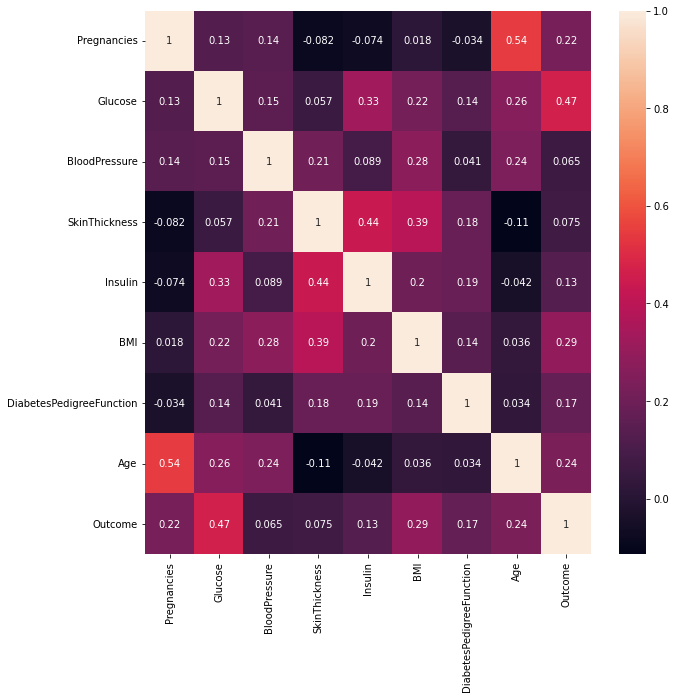

In [105]:
#plotting the Correlation Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [106]:
#converting into a numpy Matrix to feed into the model
Input_variables = np.asmatrix(df_diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
Input_variables = scale(Input_variables)
Output = np.asmatrix(df_diabetes['Outcome']).T
m = Input_variables.shape[1] 

In [107]:
print("Shape of feature matrix",Input_variables.shape)
print("Shape of Target matrix",Output.shape)

Shape of feature matrix (768, 8)
Shape of Target matrix (768, 1)


In [108]:
#Splitting data into train and test data
train_x, test_x, train_y, test_y = train_test_split(Input_variables,Output, test_size=0.2,random_state=1)
train_x,validation_x,train_y,validation_y = train_test_split(train_x,train_y, test_size=0.25)

In [109]:
print('Total number of data items:', len(df_diabetes))
print('\nNumber of data points in the training dataset:', len(train_x))
print('\nNumber of data points in the test dataset:', len(test_x))
print('\nShape of the training dataset:', train_x.shape)
print('\nShape of the test dataset:', test_x.shape)
print('\n Training dataset type:', type(train_x))
print('\n Test dataset type:', type(test_x))

Total number of data items: 768

Number of data points in the training dataset: 460

Number of data points in the test dataset: 154

Shape of the training dataset: (460, 8)

Shape of the test dataset: (154, 8)

 Training dataset type: <class 'numpy.ndarray'>

 Test dataset type: <class 'numpy.ndarray'>


In [110]:
#Initializing the weights 
#Since there are 8 features therefore size of weight vector is 8
weights = np.asmatrix([0,0,0,0,0,0,0,0]).T
#intiatilizing the no of iterations(epochs)
epochs = 1000
#learning rate(alpha)
alpha = 0.001

In [111]:
print("Shape of Target matrix",weights.shape)
validation_y.shape

Shape of Target matrix (8, 1)


(154, 1)

In [112]:
grd=[]
losstrack=[]
for i in range(epochs):
    #finding ypredicted with the help of sigmoid function
    Ypredicted= (1/(1+np.exp(-np.dot(train_x, weights))))
    #finding gradient with the help of Ypredicted
    gradient = np.dot(train_x.transpose(),  ( Ypredicted - train_y))
    #modifying the weights
    weights = weights - alpha * gradient
    #Finding the cost function value
    cost = -np.sum(np.multiply(np.log(Ypredicted), train_y) + np.multiply((1 - train_y), np.log(1 - Ypredicted)))/m
    losstrack.append(np.squeeze(cost))

In [113]:
weights

matrix([[ 0.48051237],
        [ 1.05490922],
        [-0.2407913 ],
        [ 0.13449155],
        [-0.26730595],
        [ 0.6056013 ],
        [ 0.12075552],
        [ 0.16425531]])

In [114]:
#predicting the output data with the weights we obtained
predictions = (1/(1+np.exp(-np.dot(test_x, weights))))
count=0
#Checking if the output from predictions is greater or less than 0.5 and assign 1 or 0 based on that value
for i in range(len(predictions)):
    if((predictions[i]<0.5 and test_y[i]==0) or (predictions[i]>=0.5 and test_y[i]==1)):
        count+=1

print('accuracy:', (count/len(predictions)*100))

accuracy: 77.27272727272727


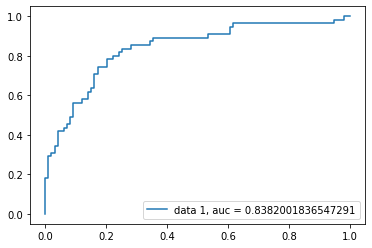

In [115]:
from sklearn import metrics
fpr, tpr,_ = metrics.roc_curve(test_y, predictions)
auc = metrics.roc_auc_score(test_y, predictions)
plt.plot(fpr, tpr, label="data 1, auc = " + str(auc))
plt.legend(loc=4)
plt.show()

In [118]:
# Getting the predictions and calculating the Sum of squared errors on the test data.
errors = []
for i in range(len(test_y)):
    errors.append((test_y[i] - predictions[i]) ** 2)
#Finding the Sum of Squared Errors and RMSE error.
print('Sum of Squared Errors Gradient Descent:', sum(errors))
print('RMSE:', np.sqrt(sum(errors) / len(errors)))

Sum of Squared Errors Gradient Descent: [[26.69100859]]
RMSE: [[0.41631507]]


Text(0, 0.5, 'Cost')

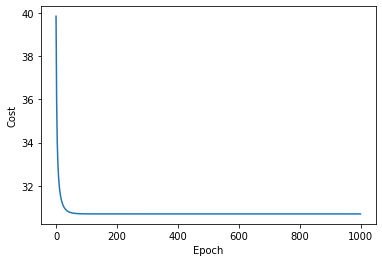

In [119]:
plt.plot(losstrack)
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [137]:
# Using L2 regularization to model a neural network
# Neural Network with 3 Hidden Layers.

# Creating the model.
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=8))  # Hidden layer 1.
model.add(Dense(32, activation='relu',kernel_regularizer='l2'))# Hidden layer 2.
model.add(Dense(32, activation='relu',kernel_regularizer='l2'))# Hidden layer 3.
model.add(Dense(2, activation='softmax'))  # Output layer.(Since there are 2 classes)

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(train_x, to_categorical(train_y),
                    validation_data=(validation_x, to_categorical(validation_y)), epochs=500, batch_size=64)

# Evaluating the model
loss, accuracy = model.evaluate(test_x, to_categorical(test_y))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_125 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_126 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_127 (Dense)            (None, 2)                 66        
Total params: 1,482
Trainable params: 1,482
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
8/8 [==============================] - 1s 24ms/step - loss: 1.1357 - accuracy: 0.5804 - val_loss: 1.1203 - val_accuracy: 0.6429
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 1.1276 - accuracy: 0.6196 - val_l

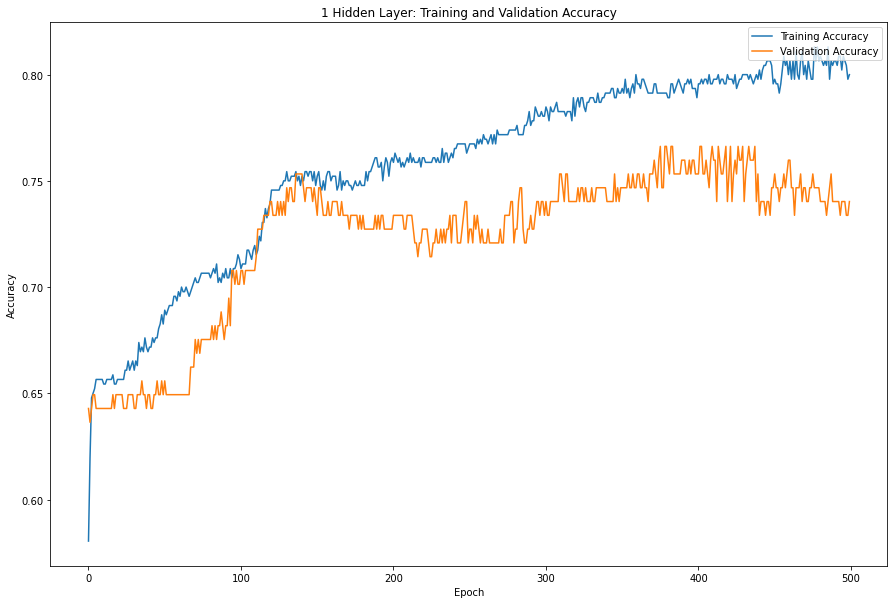

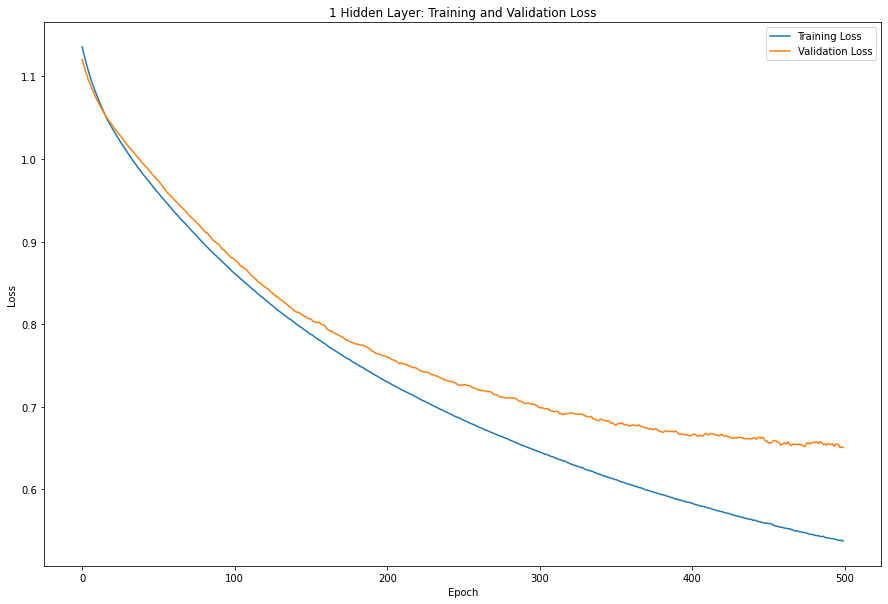

In [140]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1 Hidden Layer: Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('1 Hidden Layer: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [131]:
# Using L1 regularization
# This Neural Network contains 3 Hidden Layers.

# Creating the model.
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=8))  # Hidden layer 1.
model.add(Dense(32, activation='relu',kernel_regularizer='l1'))# Hidden layer 2.
model.add(Dense(32, activation='relu',kernel_regularizer='l1'))# Hidden layer 3.
model.add(Dense(2, activation='softmax'))  # Output layer.(Since there are 2 classes)


model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(train_x, to_categorical(train_y),
                    validation_data=(validation_x, to_categorical(validation_y)), epochs=500, batch_size=64)

# Evaluating the model
loss, accuracy = model.evaluate(test_x, to_categorical(test_y))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_105 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_106 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_107 (Dense)            (None, 2)                 66        
Total params: 1,482
Trainable params: 1,482
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
8/8 [==============================] - 1s 25ms/step - loss: 2.7200 - accuracy: 0.5261 - val_loss: 2.6782 - val_accuracy: 0.6104
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 2.7018 - accuracy: 0.6000 - val_l

In [134]:
# Using Dropout regularization
# This Neural Network with 3 Hidden Layers.

# Creating the model.
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=8))  # Hidden layer 1.
model.add(Dense(32, activation='relu'))# Hidden layer 2.
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))# Hidden layer 3.
model.add(Dropout(0.2)) 
model.add(Dense(2, activation='softmax'))  # Output layer.(Since there are 2 classes)


model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(train_x, to_categorical(train_y),
                    validation_data=(validation_x, to_categorical(validation_y)), epochs=500, batch_size=64)

# Evaluating the model
loss, accuracy = model.evaluate(test_x, to_categorical(test_y))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_117 (Dense)            (None, 32)                288       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 2)                 66        
Total params: 1,482
Trainable params: 1,482
Non-trainable params: 0
___________________________________________________